1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [ ]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

2D Gaussian 1st array: 
[[0.99828574 0.99920344 0.98664113 0.92905594 0.83213978]
 [0.99999879 0.99988663 0.98186631 0.92273163 0.82569559]
 [0.96651877 0.96497335 0.93380984 0.86889614 0.77284683]
 [0.86810753 0.86633327 0.83272645 0.76869774 0.67916969]
 [0.72324844 0.72162039 0.69118083 0.63469732 0.55773294]]
(5, 5)


2D Gaussian 2th array: 
[[0.92828583 0.9803515  0.99999615 0.97703382 0.90930233]
 [0.9626216  0.99486502 0.9959487  0.95769156 0.87936776]
 [0.98730083 0.99999398 0.98304339 0.9303367  0.84254329]
 [0.99925497 0.99347553 0.95985436 0.89430763 0.79878214]
 [0.99624029 0.9738084  0.92561971 0.84948589 0.74845025]]
(5, 5)


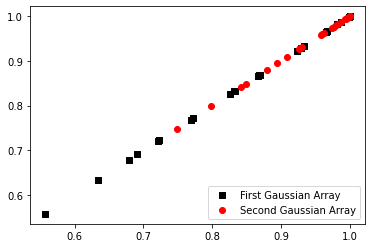

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#2D Gaussian Array 1.th Category
x1, y1 = np.meshgrid(np.linspace(-1,8,5), np.linspace(-1,10,5)) 
dst1 = np.sqrt(x1*x1+y1*y1) 
sigma_1 = 10
muu_1 = 2
gaussian_1 = np.exp(-(((dst1-muu_1)**2)/(2.0*sigma_1**2))) 

print("2D Gaussian 1st array: ") 
print(gaussian_1)
print(np.shape(gaussian_1))
print("\n")

#2D Gaussian Array 2nd Category
x2, y2 = np.meshgrid(np.linspace(5,10,5), np.linspace(5,8,5)) 
dst2 = np.sqrt(x2*x2+y2*y2) 
sigma_2 = 5
muu_2 = 9  
gaussian_2 = np.exp(-(((dst2-muu_2)**2)/(2.0*sigma_2**2)))  

print("2D Gaussian 2th array: ") 
print(gaussian_2)
print(np.shape(gaussian_2))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(gaussian_1,gaussian_1, c='k', marker="s", label='First Gaussian Array')
ax1.scatter(gaussian_2,gaussian_2, c='r', marker="o", label='Second Gaussian Array')
plt.legend(loc='lower right');
plt.show()


2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11131 entries, 0 to 11130
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   residuals  11131 non-null  float64
 1   distances  11131 non-null  float64
dtypes: float64(2)
memory usage: 174.0 KB
None
Columns: Index(['residuals', 'distances'], dtype='object')
       residuals  distances
293         2.50      18.60
294         3.65      10.70
687         2.01      11.40
1098        2.13       4.20
2127        3.77      16.45
3227        3.35      19.00
3294        3.82      17.90
3574        2.40      11.70
4247        

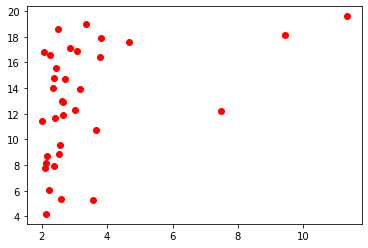

slope = 0.8615230331626538  intercept = 9.957463027753427  r_value = 0.40376438121365693  p_value = 0.017880459715836065  stderr = 0.34508014140491694
[18.6  10.7  11.4   4.2  16.45 19.   17.9  11.7  12.3   5.3   9.6  14.7
 17.6   8.7   7.8  13.    7.9  15.6  11.9  13.9  18.1   5.4  17.1  14.8
 12.2  12.9  16.6   8.2  19.6  16.8   6.1  14.03 16.9   8.9 ]
(array([ 1,  9, 12, 12], dtype=int64), array([ 0,  5, 10, 15, 20]))
[(15, 20], (10, 15], (10, 15], (0, 5], (15, 20], ..., (15, 20], (5, 10], (10, 15], (15, 20], (5, 10]]
Length: 34
Categories (4, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20]]
               mean       std
distances                    
(0, 5]     2.130000       NaN
(5, 10]    2.468889  0.455040
(10, 15]   3.087500  1.451126
(15, 20]   4.297500  2.963205


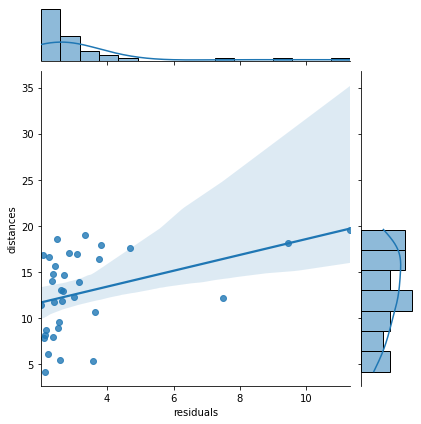

In [15]:
import pandas as pd   
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


#Writing the path file
data=np.load("/Users/h-a-k/HLP_LAB 7/residuals_261.pkl",allow_pickle=True).item()

#Convert the content to a Pandas Dataframe
data=pd.DataFrame(data)

#Inspect the dataset, you'll find two variables (features)
print(data)
print(data.info())
print("Columns:", data.columns)

#Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
data.drop( data[ data['residuals'] < 2 ].index , inplace=True)
data=data[data['residuals']>2] #different way to delete
print(data)

#Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression.
x = data.residuals
y = data.distances

#original data plot
plt.scatter(x,y, color="red", marker="o", label="Original data")
plt.show()

##linear regression:
slope, intercept, r_value, p_value, stderr = stats.linregress(x, y)
print("slope =",slope," intercept =",intercept," r_value =",r_value," p_value =",p_value," stderr =",stderr)

#Seaborn linear regression
sns.jointplot(data=data, x="residuals", y="distances", kind="reg")
# binning of distances
dis_array=np.array(data.distances)
bins=[0,5,10,15,20]
print(dis_array)
dis_bin=np.histogram(dis_array,bins = bins ) 
print(dis_bin)

#Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
binned_data=pd.cut(dis_array,bins)
print(binned_data)
#mean and standard deviatoin of residuals according to bins of distances
mean_std=data.groupby(pd.cut(data['distances'], bins=bins))['residuals'].agg(['mean','std'])
print(mean_std)


3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


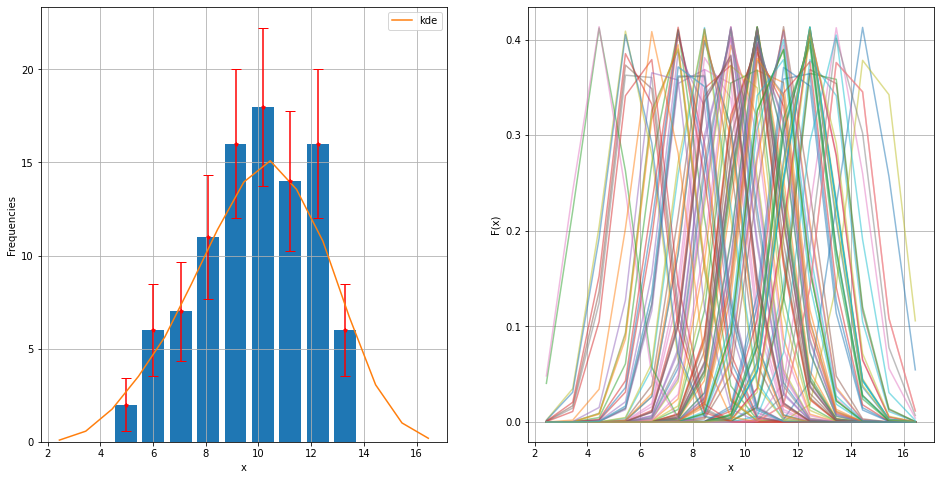

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate

#Fill a numpy array x of length N (with  𝑁=O(100) ) with a variable normally distributed, with a given mean and standard deviation
mu, sigma = 10, 2 # mean and standard deviation
N=100
x = np.random.normal(mu, sigma, N)


#Fill an histogram in pyplot taking proper care of the aesthetic
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

#use a meaningful number of bins, set a proper y axis label, set proper value of y axis major ticks labels  
Nbins=10
bins=np.arange(x.min(), x.max(), (x.max()-x.min())/Nbins)
freq, bins, patches = ax1.hist(x=x, bins=bins,alpha=1, histtype='bar', rwidth=0.8)
ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('Frequencies')

#display the histograms as data points with errors 
bincenters = (bins[1:] + bins[:-1])/2
ax1.errorbar(x=bincenters, y=freq, yerr=np.sqrt(freq), fmt='o', c='r', marker='*', markersize=4, capsize=5)

#For every element of x, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. 
std_def = 1.06 * x.std() * (x.size ** -0.2)
xrange = np.arange(x.min()-sigma, x.max()+sigma)
gaussians = []
for i, dat in enumerate(x):
    gaussians.append( norm(loc=dat, scale=std_def).pdf(xrange) )
    ax2.plot(xrange, gaussians[i], alpha=0.5)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.grid()

#Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. 
area=integrate.trapz(freq, dx=bins[1]-bins[0])
kde=np.array(gaussians).sum(axis=0)
ax1.plot(xrange,kde/sum(kde)*area,label='kde')
ax1.legend()

plt.show()